In [23]:
import pandas as pd
import missingno as msno

# Работа с дубликатами

In [66]:
# Постановка задачи.
# Построить модель классификации, определяющую категорию цены поддержанного автомобиля в зависимости от характеристик ТС.
df = pd.read_csv("data/vehicles_dataset.csv", sep=",")


In [7]:
df.duplicated() # Return boolean mask

0        False
1        False
2        False
3        False
4        False
         ...  
10045    False
10046    False
10047    False
10048    False
10049    False
Length: 10050, dtype: bool

In [12]:
df[df.duplicated()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category


In [11]:
df = df.drop_duplicates()
df.shape

(10000, 27)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    9618 non-null   object 
 7   model           9872 non-null   object 
 8   condition       6234 non-null   object 
 9   cylinders       5920 non-null   object 
 10  fuel            9937 non-null   object 
 11  odometer        9957 non-null   float64
 12  title_status    9834 non-null   object 
 13  transmission    9955 non-null   object 
 14  VIN             6062 non-null   object 
 15  drive           6994 non-null   object 
 16  size            2809 non-null   object 
 17  type            7806 non-null   obje

<Axes: >

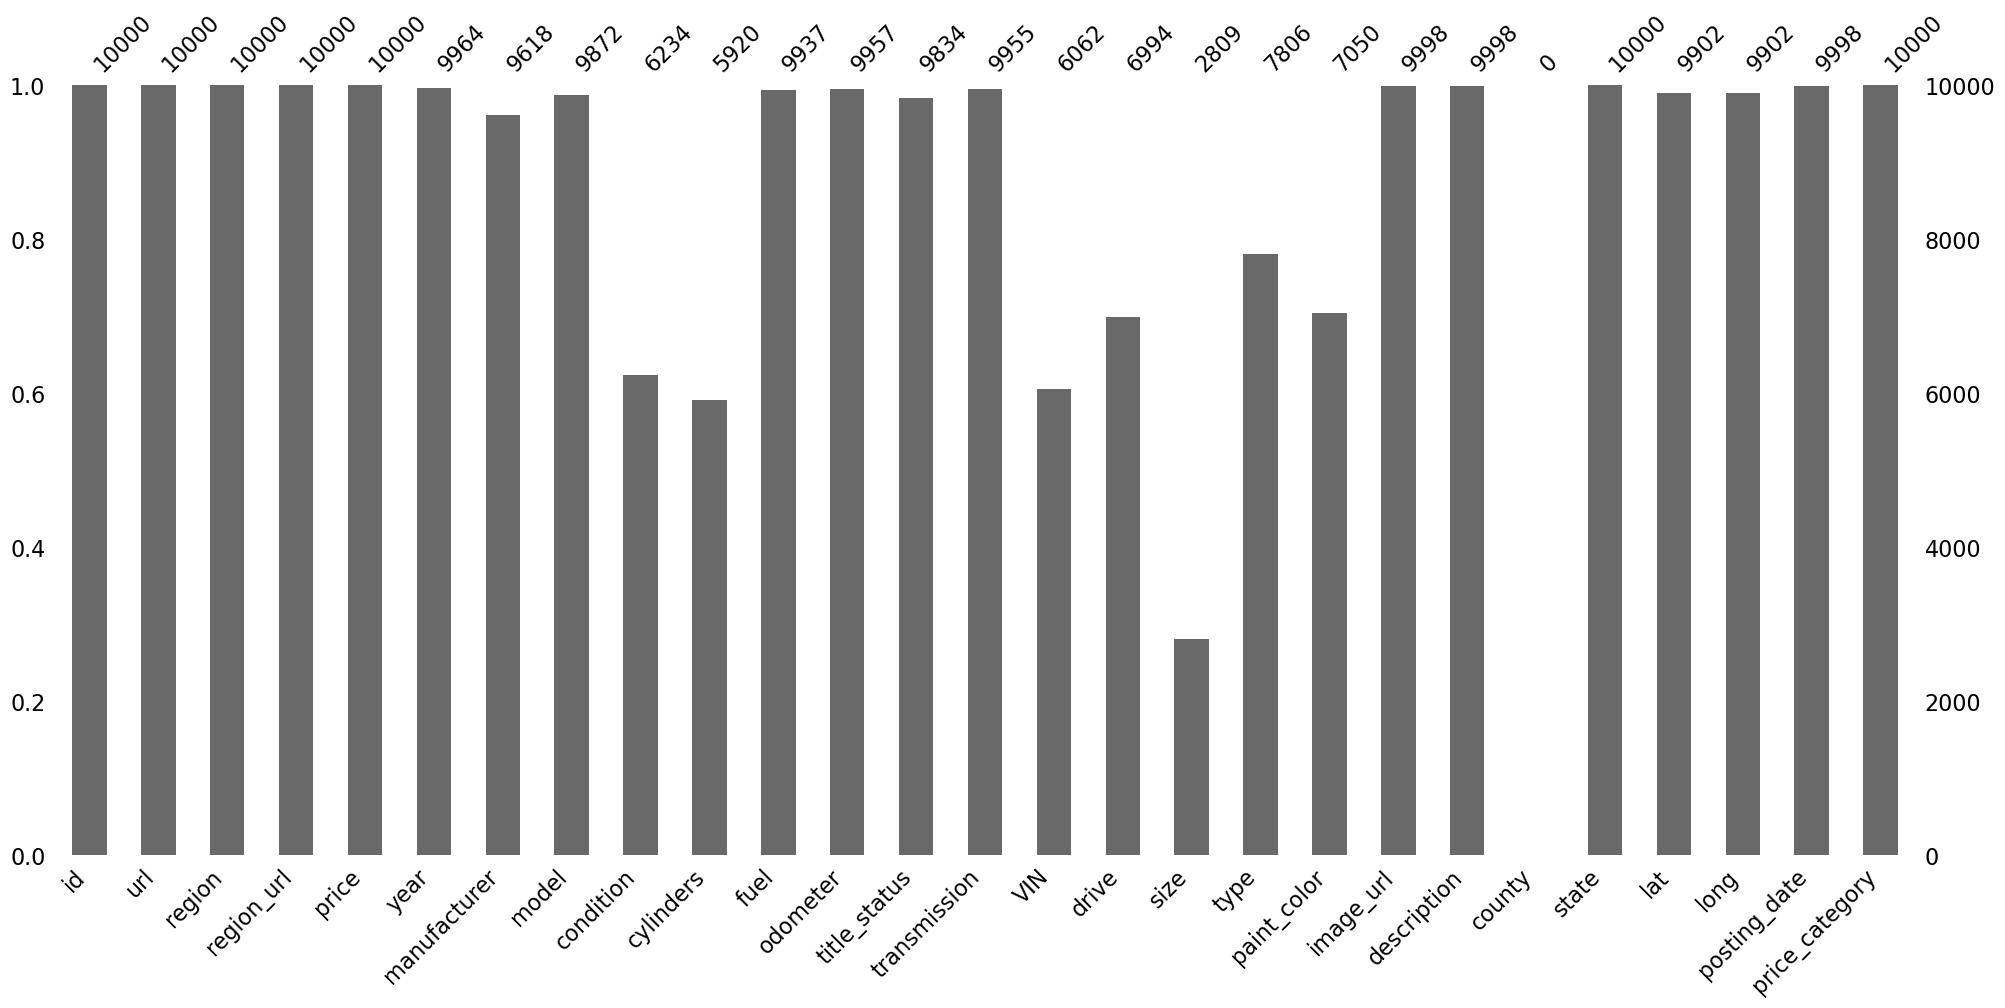

In [17]:
msno.bar(df)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

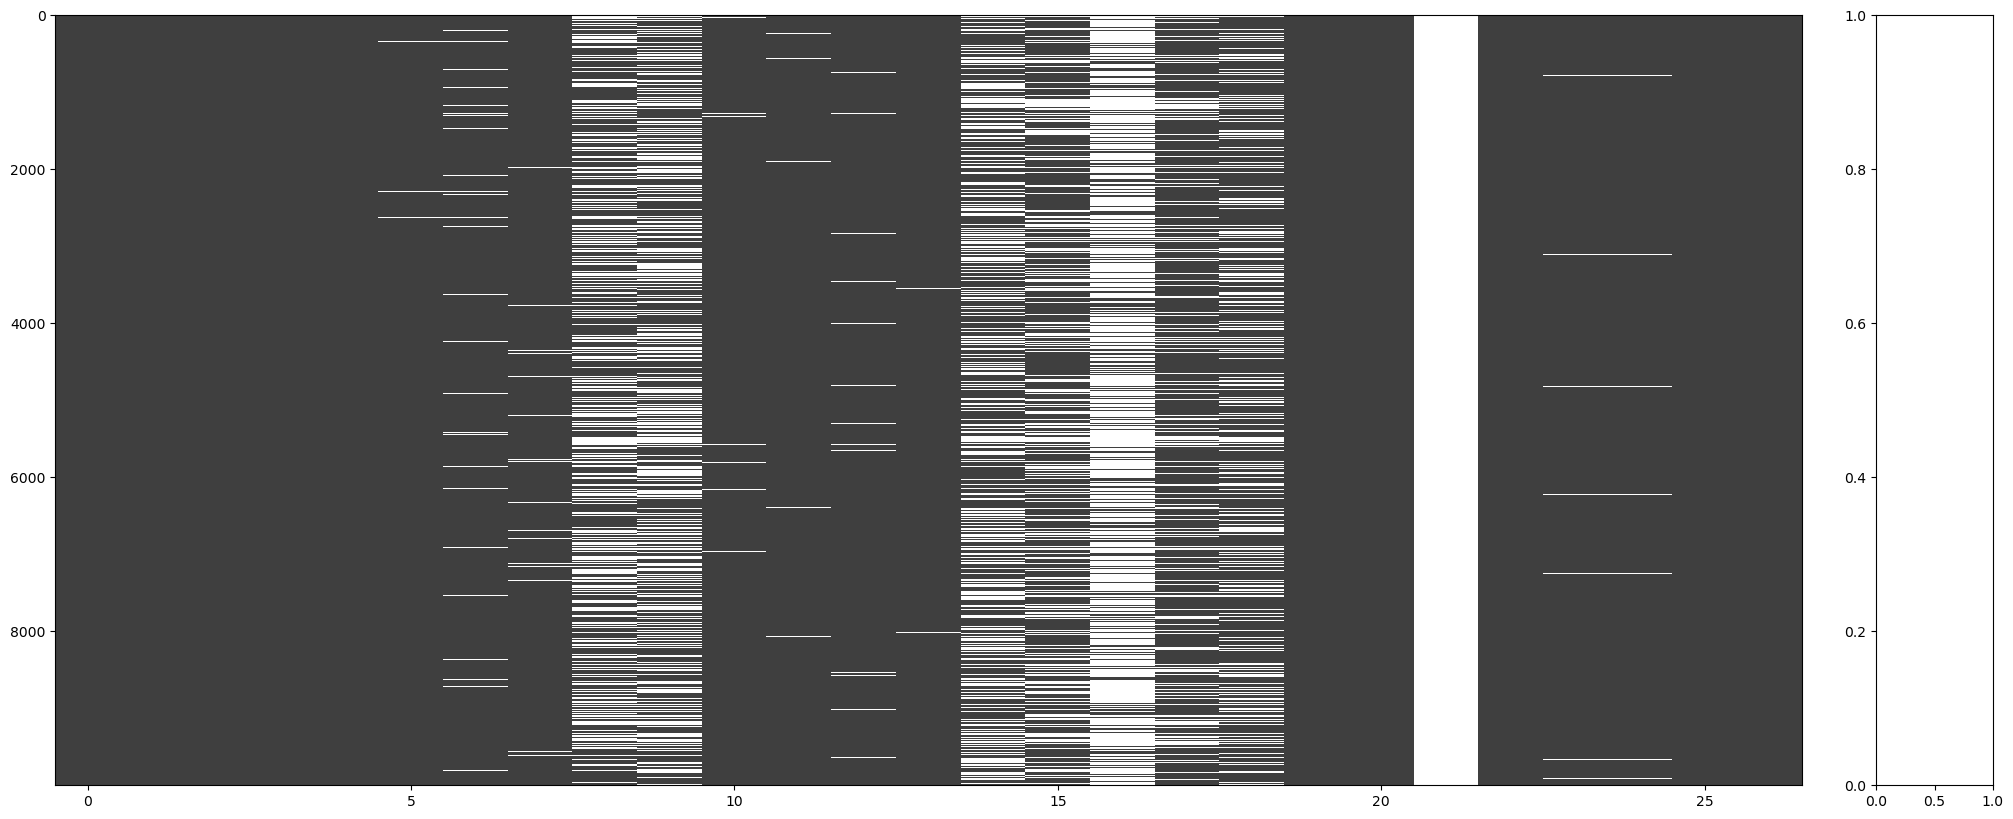

In [25]:
msno.matrix(df)

In [31]:
missing_values = ((df.isna().sum()) / len(df) * 100).sort_values()
missing_values # пропущенные значения

id                  0.00
state               0.00
price               0.00
price_category      0.00
region              0.00
url                 0.00
region_url          0.00
description         0.02
image_url           0.02
posting_date        0.02
year                0.36
odometer            0.43
transmission        0.45
fuel                0.63
lat                 0.98
long                0.98
model               1.28
title_status        1.66
manufacturer        3.82
type               21.94
paint_color        29.50
drive              30.06
condition          37.66
VIN                39.38
cylinders          40.80
size               71.91
county            100.00
dtype: float64

In [34]:
df.county.value_counts(dropna=False)

county
NaN    10000
Name: count, dtype: int64

In [36]:
df_clean = df.copy()
df_clean = df_clean.drop(columns=["county"])
df_clean.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,NaN,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,NaN,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,NaN,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


In [39]:
def print_useful_rows_info(df): 
   print("Количество полностью заполненных объектов из всей     выборки: ", len(df.dropna()))
   print("Процент полностью заполненных объектов из всей выборки: ", round(len(df.dropna()) / len(df) * 100, 2))
   

In [42]:
print_useful_rows_info(df_clean)


Количество полностью заполненных объектов из всей     выборки:  823
Процент полностью заполненных объектов из всей выборки:  8.23


In [45]:
#df_clean = df_clean.drop(columns=["VIN", "condition", "cylinders", 'size', "drive", "paint_color", "type"])
print_useful_rows_info(df_clean)


Количество полностью заполненных объектов из всей     выборки:  9134
Процент полностью заполненных объектов из всей выборки:  91.34


In [47]:
df_clean.manufacturer.value_counts(dropna=False)

manufacturer
ford               1638
chevrolet          1293
toyota              779
jeep                490
honda               466
nissan              454
ram                 411
NaN                 382
gmc                 358
bmw                 330
dodge               325
volkswagen          251
mercedes-benz       239
hyundai             225
subaru              210
kia                 200
audi                200
lexus               184
cadillac            183
chrysler            161
acura               150
buick               145
mazda               142
infiniti            117
lincoln             113
mitsubishi           82
mini                 72
volvo                67
pontiac              61
rover                59
jaguar               45
porsche              37
mercury              32
tesla                27
saturn               25
fiat                 23
alfa-romeo           14
ferrari               4
harley-davidson       4
datsun                2
Name: count, dtype: int64

In [51]:
#df_clean[df_clean.manufacturer.isna()][['model', 'description']]

,model,description


In [52]:
#df_clean.manufacturer = df_clean.manufacturer.fillna("other")

In [54]:
df_clean.odometer.value_counts(dropna=False)

odometer
100000.0    50
NaN         43
1.0         42
180000.0    37
200000.0    37
            ..
32086.0      1
126872.0     1
68967.0      1
124248.0     1
61943.0      1
Name: count, Length: 7007, dtype: int64

In [67]:
df_clean[df_clean.odometer.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category


In [61]:
df_clean.odometer = df_clean.odometer.fillna(int(df_clean.odometer.mean()))

In [63]:
df_clean.odometer.isna().sum()

0

In [68]:
#df_clean.to_csv("data/df_clean.csv", index=False)

# Приведение типов

In [81]:
df = pd.DataFrame(data={'weight': ['64', '75'], 'height': [160, 185]}) # pd — импортированный пакет pandas
df


,weight,height
0,64,160
1,75,185


In [74]:
df.height.sum()

345

In [76]:
df.weight.sum()

'6475'

In [82]:
df.dtypes

weight    object
height     int64
dtype: object

In [85]:
df.weight = pd.to_numeric(df.weight)
df.dtypes

weight    int64
height    int64
dtype: object

In [87]:
df.weight.sum()

139

In [92]:
df_clean = pd.read_csv("data/df_clean.csv", sep=",")
df_clean.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442.0,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023.0,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048.0,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291.0,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000.0,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


In [96]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  float64
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

In [98]:
df_clean.odometer.values.tolist()

[27442.0,
 60023.0,
 14048.0,
 117291.0,
 8000.0,
 80465.0,
 149000.0,
 145087.0,
 94535.0,
 87000.0,
 130000.0,
 59242.0,
 196000.0,
 156925.0,
 73562.0,
 113000.0,
 72349.0,
 73135.0,
 136142.0,
 0.0,
 108000.0,
 111111.0,
 33000.0,
 200000.0,
 110310.0,
 67200.0,
 37938.0,
 307000.0,
 94000.0,
 86496.0,
 114590.0,
 84116.0,
 193242.0,
 41759.0,
 133000.0,
 55098.0,
 39601.0,
 126000.0,
 5933.0,
 18553.0,
 112336.0,
 132758.0,
 181600.0,
 134513.0,
 217885.0,
 58693.0,
 212000.0,
 193972.0,
 158855.0,
 180000.0,
 44000.0,
 25700.0,
 10501.0,
 106740.0,
 155919.0,
 240000.0,
 67696.0,
 1.0,
 88698.0,
 177117.0,
 131350.0,
 117572.0,
 165714.0,
 25381.0,
 197000.0,
 47675.0,
 30000.0,
 165206.0,
 61520.0,
 58849.0,
 25291.0,
 46125.0,
 30139.0,
 146816.0,
 49307.0,
 157884.0,
 31315.0,
 29315.0,
 79522.0,
 80435.0,
 70110.0,
 153092.0,
 139619.0,
 11953.0,
 56977.0,
 84797.0,
 151000.0,
 64919.0,
 75239.0,
 127000.0,
 63659.0,
 113000.0,
 61000.0,
 79136.0,
 54117.0,
 55955.0,
 17799.0

In [99]:
df_types = df_clean.copy()

In [101]:
#df_types.odometer = df_types.odometer.astype(int)

In [105]:
df_types.dtypes

id                  int64
url                object
region             object
region_url         object
price               int64
year              float64
manufacturer       object
model              object
fuel               object
odometer            int32
title_status       object
transmission       object
image_url          object
description        object
state              object
lat               float64
long              float64
posting_date       object
price_category     object
dtype: object

In [107]:
df_types.posting_date.values.tolist()

['2021-04-17T12:30:50-0400',
 '2021-05-03T15:40:21-0400',
 '2021-04-28T03:52:20-0700',
 '2021-04-17T10:08:57-0400',
 '2021-05-03T18:32:06-0400',
 '2021-04-08T15:10:56-0400',
 '2021-05-04T11:59:42-0500',
 '2021-04-23T19:34:13-0400',
 '2021-04-30T17:20:30-0400',
 '2021-04-27T21:14:22-0500',
 '2021-04-30T15:20:33-0400',
 '2021-05-03T21:03:32-0400',
 '2021-04-21T13:03:14-0400',
 '2021-05-04T20:22:11-0700',
 '2021-04-08T14:36:36-0700',
 '2021-05-04T11:01:47-1000',
 '2021-04-28T19:09:23-0500',
 '2021-04-19T10:42:16-0600',
 '2021-04-23T11:02:25-0700',
 '2021-04-29T14:06:55-0400',
 '2021-05-01T15:46:41-0700',
 '2021-04-25T10:10:43-0500',
 '2021-04-25T13:28:23-0700',
 '2021-04-21T11:06:50-0400',
 '2021-05-03T13:43:57-0700',
 '2021-04-22T08:02:36-0400',
 '2021-04-11T12:11:15-0400',
 '2021-04-23T14:27:25-0500',
 '2021-04-16T19:10:16-0400',
 '2021-04-08T15:16:13-0500',
 '2021-04-22T09:16:38-0500',
 '2021-04-28T19:40:08-0700',
 '2021-04-20T10:40:15-0700',
 '2021-04-09T19:46:04-0700',
 '2021-04-22T1

In [112]:
df_types['date'] = pd.to_datetime(df_types.posting_date, utc=True)
df_types["date"]

0      2021-04-17 16:30:50+00:00
1      2021-05-03 19:40:21+00:00
2      2021-04-28 10:52:20+00:00
3      2021-04-17 14:08:57+00:00
4      2021-05-03 22:32:06+00:00
                  ...           
9995   2021-04-10 20:33:57+00:00
9996   2021-05-03 13:36:30+00:00
9997   2021-04-22 19:14:01+00:00
9998   2021-04-14 14:14:42+00:00
9999   2021-04-24 17:50:49+00:00
Name: date, Length: 10000, dtype: datetime64[ns, UTC]

In [114]:
df_types.date[0].day

17

# Аномалии и выбросы

In [116]:
df_out = df_types.copy()
df_out.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [121]:
df_out.odometer.describe().apply(lambda x: f"{x:0.3f}")

count      10000.000
mean       95674.678
std        86472.655
min            0.000
25%        39147.250
50%        89000.000
75%       136875.000
max      3245000.000
Name: odometer, dtype: object

In [123]:
df_out.odometer.quantile(0.75)

136875.0

In [126]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [130]:
boundaries = calculate_outliers(df_out.odometer)
boundaries

(-107445.0, 283467.0)

In [135]:
is_outliner = (df_out.odometer < boundaries[0]) | (df_out.odometer > boundaries[1])
is_outliner.sum() / len(df_out)

0.0091

In [137]:
df_out[is_outliner]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
27,7311516735,https://easttexas.craigslist.org/cto/d/lufkin-...,tyler / east TX,https://easttexas.craigslist.org,17000,2003.0,dodge,3500,diesel,307000,clean,automatic,https://images.craigslist.org/00Q0Q_8WsRzpw9LV...,2003 Dodge 3500 4x4 diesel dually. It has 307k...,tx,31.270000,-94.646900,2021-04-23T14:27:25-0500,medium,2021-04-23 19:27:25+00:00
114,7310943842,https://showlow.craigslist.org/ctd/d/pinetop-2...,show low,https://showlow.craigslist.org,2795,2004.0,mazda,tribute,gas,999999,clean,automatic,https://images.craigslist.org/00y0y_9hjvC3qkk3...,ACCUSHINE AUTO SALES 1827 E. WHITE MTN. BLVD. ...,az,34.117500,-109.919700,2021-04-22T10:52:07-0700,low,2021-04-22 17:52:07+00:00
385,7306101528,https://desmoines.craigslist.org/ctd/d/windom-...,des moines,https://desmoines.craigslist.org,59950,2013.0,other,CATERPILLAR CT660S,diesel,345256,clean,automatic,https://images.craigslist.org/00I0I_UkoGuDPqYZ...,LA MOTORSPORTS DIESELTRUCKSMN.COM 2013 CATERP...,ia,43.863689,-95.113792,2021-04-13T08:34:24-0500,high,2021-04-13 13:34:24+00:00
444,7304168190,https://elpaso.craigslist.org/ctd/d/las-cruces...,el paso,https://elpaso.craigslist.org,16999,2016.0,jeep,renegade,gas,999999,clean,automatic,https://images.craigslist.org/00Q0Q_ajHii9qB6e...,"‘16 Jeep Renegade Limited, auto, air, power wi...",tx,32.288990,-106.781616,2021-04-09T09:26:05-0600,medium,2021-04-09 15:26:05+00:00
552,7314722320,https://nh.craigslist.org/ctd/d/medford-2015-h...,new hampshire,https://nh.craigslist.org,26500,2015.0,other,HINO 268A,diesel,429194,clean,automatic,https://images.craigslist.org/01111_aEpkHS4iop...,"2015 HINO 268A 24' REFRIG NCDL 260 HP, ALLISIO...",nh,42.417300,-71.108700,2021-04-30T07:30:45-0400,high,2021-04-30 11:30:45+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,7314148003,https://kansascity.craigslist.org/cto/d/lees-s...,"kansas city, MO",https://kansascity.craigslist.org,2999,2010.0,chevrolet,hhr ls,gas,344000,clean,automatic,https://images.craigslist.org/00n0n_h4YYCjZeD9...,2010 CHEVY HHR LS --- POWER LOCKS/WINDOWS/MIRR...,ks,38.851800,-94.394400,2021-04-28T20:15:49-0500,low,2021-04-29 01:15:49+00:00
9275,7313696556,https://mcallen.craigslist.org/cto/d/mcallen-2...,mcallen / edinburg,https://mcallen.craigslist.org,4500,2003.0,chevrolet,avalanche,gas,298968,clean,automatic,https://images.craigslist.org/00m0m_ey8pcui9d1...,Vendo mi Chevrolet Avalanche 2003 que está en ...,tx,26.215400,-98.235900,2021-04-27T23:10:38-0500,low,2021-04-28 04:10:38+00:00
9389,7306697432,https://knoxville.craigslist.org/cto/d/knoxvil...,knoxville,https://knoxville.craigslist.org,3550,2012.0,nissan,nv2500,gas,370000,clean,automatic,https://images.craigslist.org/00404_guoJBc6u6o...,Good running and driving van,tn,35.991800,-83.849600,2021-04-14T11:54:41-0400,low,2021-04-14 15:54:41+00:00
9500,7311709925,https://greatfalls.craigslist.org/cto/d/havre-...,great falls,https://greatfalls.craigslist.org,7000,2005.0,chevrolet,silverado,gas,290000,clean,automatic,https://images.craigslist.org/00808_hX52l6571o...,"2005 Chevy 1500 LS, has 290k miles on it but h...",mt,48.542862,-109.695310,2021-04-23T20:41:47-0600,low,2021-04-24 02:41:47+00:00


In [141]:
df_out.loc[is_outliner, 'odometer'] = int(boundaries[1])
df_out.odometer.describe()

count     10000.000000
mean      93324.143100
std       63181.202379
min           0.000000
25%       39147.250000
50%       89000.000000
75%      136875.000000
max      283467.000000
Name: odometer, dtype: float64

In [144]:
#df_out.to_csv("data/18homework.csv", index=False)